# Introdução Simples ao Aprendizado de Máquina

Este notebook apresenta três tipos principais de aprendizado de máquina com exemplos simples e fáceis de entender:

- **Aprendizado Supervisionado** (modelo aprende com exemplos e respostas)
- **Aprendizado Não Supervisionado** (modelo encontra padrões sozinho)
- **Aprendizado por Reforço** (modelo aprende por tentativa e erro)


## Aprendizado Supervisionado

**Exemplo:** Prever se uma pessoa gosta de um filme baseado em exemplos anteriores.

Vamos usar um modelo simples para prever se alguém gostou de um filme com base em idade e nota média dos filmes que assistiu.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dados: [idade, nota média dos filmes assistidos]
X = [[15, 2.0], [25, 4.5], [30, 4.8], [17, 2.2], [40, 4.9], [18, 2.5]]
y = [0, 1, 1, 0, 1, 0]  # 0 = não gostou, 1 = gostou

# Dividimos os dados em duas partes:
# - 70% para treinar o modelo (X_train, y_train)
# - 30% para testar se ele aprendeu bem (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criamos um modelo do tipo Árvore de Decisão
modelo = DecisionTreeClassifier()

# Treinamos o modelo com os dados de treino (ele aprende a relação entre os dados e as respostas)
modelo.fit(X_train, y_train)

# Agora usamos o modelo para fazer previsões com os dados de teste (que ele nunca viu antes)
previsoes = modelo.predict(X_test)

# Avaliamos o desempenho do modelo comparando as previsões com as respostas reais
print("Acurácia:", accuracy_score(y_test, previsoes))  # Porcentagem de acertos
print("Previsões:", previsoes)  # O que o modelo respondeu
print("Reais:", y_test)         # As respostas corretas (gabarito)


Acurácia: 1.0
Previsões: [0 1]
Reais: [0, 1]


## Aprendizado Não Supervisionado

**Exemplo:** Agrupar pontos em um plano (sem saber os grupos antes).

Vamos gerar pontos no espaço e pedir para o modelo agrupá-los automaticamente.

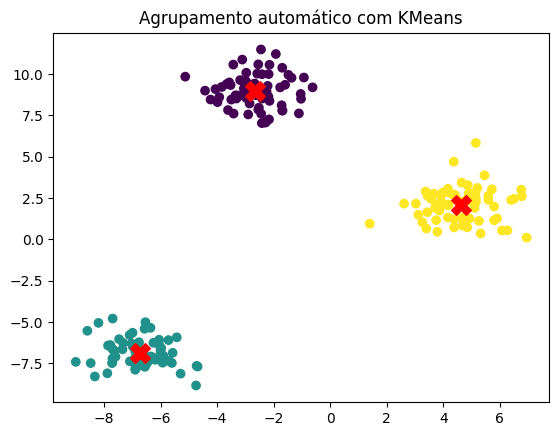

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Geramos dados artificiais com 3 grupos (ou "clusters") distintos
# Cada ponto tem 2 coordenadas (como se fossem x e y no plano)
# O "_" ignora os rótulos verdadeiros, pois não vamos usá-los (não supervisionado)
X, _ = make_blobs(n_samples=200, centers=3, random_state=42)

# Criamos o modelo KMeans e pedimos para encontrar 3 grupos nos dados
kmeans = KMeans(n_clusters=3, random_state=42)

# Aplicamos o algoritmo nos dados (fit_predict faz os dois passos: ajustar + prever grupos)
grupos = kmeans.fit_predict(X)

# Visualizamos os pontos coloridos de acordo com o grupo ao qual pertencem
plt.scatter(X[:, 0], X[:, 1], c=grupos, cmap='viridis')

# Mostramos também os centros dos grupos encontrados (marcados com "X" vermelho)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X')

plt.title("Agrupamento automático com KMeans")
plt.show()

## Aprendizado por Reforço

Neste tipo de aprendizado, o modelo é um agente que aprende com as consequências de suas ações.

**Exemplo simples:** Imagine um robô tentando aprender a andar para frente. Cada vez que ele anda na direção certa, ele ganha pontos (recompensa). Se ele cair, perde pontos.

Com o tempo, ele aprende a andar sem cair, apenas testando e observando o que dá certo ou errado.

Este tipo de aprendizado é usado em jogos, controle de robôs e tomada de decisões em ambientes interativos.

**Nota:** É mais complexo de implementar, mas a ideia central é o aprendizado por tentativa e erro.